# Assignment 5

**Name Surname**: Emre Girgin \
**Student ID**: 2016400099

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jax 
import jax.numpy as jnp
%env JAX_PLATFORM_NAME=cpu
np.random.seed(0)

env: JAX_PLATFORM_NAME=cpu


## Question 1

In [2]:
iris = pd.read_csv("iris.data", names=["f0", "f1", "f2", "f3", "class"])
iris = iris.replace('Iris-versicolor', 0)
iris = iris.replace('Iris-virginica', 1)
iris = iris.to_numpy()[-100:]
iris[:5]

array([[7.0, 3.2, 4.7, 1.4, 0],
       [6.4, 3.2, 4.5, 1.5, 0],
       [6.9, 3.1, 4.9, 1.5, 0],
       [5.5, 2.3, 4.0, 1.3, 0],
       [6.5, 2.8, 4.6, 1.5, 0]], dtype=object)

In [3]:
A = iris[:,:-1].astype("float64")
y = iris[:,-1].astype("float64")

### a.

In [4]:
A.shape

(100, 4)

In [5]:
U, s_vector, V_T = np.linalg.svd(A)

In [6]:
sigma = np.zeros_like(A, dtype="float64")
for i, eigenvalue in enumerate(s_vector):
    sigma[i,i] = eigenvalue

In [7]:
C = U @ sigma
X = C[:, :2]

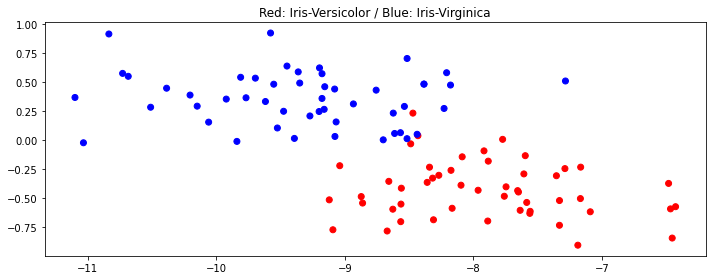

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
colors = ["r" if label == 0 else "b" for label in y]
axes.scatter(X[:,0], X[:,1], c=colors)
plt.title("Red: Iris-Versicolor / Blue: Iris-Virginica")
plt.tight_layout()

### b.

We projected our dataset into a lower-dimensional subspace called *principal subspace*. The basis vectors for this subspace carried by the columns of the $V$ vector. (Mathematics for ML pg.327)

In [9]:
print("Basis for principal subspace: \n{}".format(V_T[:2]))

Basis for principal subspace: 
[[-0.7245005  -0.33128748 -0.57171318 -0.19619293]
 [-0.49696695 -0.30853471  0.63571744  0.50367998]]


## Question 2

In [10]:
def sigmoid(value):
    return 1 / (1 + jnp.exp(-value))

In [11]:
def model(data, theta):
    pred = sigmoid(jnp.dot(data, theta))
    return pred

In [12]:
def logistic_loss(theta, data, labels):
    preds = model(data, theta)
    N = len(preds)
    return 1/N * jnp.sum(
        -labels * jnp.log(preds) - (1 - labels) * jnp.log(1-preds)
    )

### a.

$
L(\theta) = 
\begin{cases} 
-log(h_{\theta}(x)) & y = 1 \\
-log(1-h_{\theta}(x)) & y = 0 
\end{cases} = -ylog(h_{\theta}(x)) - (1-y)log(1-h_{\theta}(x))
$
where 
$
h_{\theta}(x) = \frac{1}{1 + e^{-\theta^T x}} 
$

The derivative of the sigmoid function is

$
\sigma(x) = \frac{1}{1+e^{-x}} \\
\frac{\partial(\sigma(x))}{\partial x} = \frac{0 * (1+e^{-2}) - (1) * (e^{-x} * (-1))}{(1 + e^{-x})^{2}}\\
\frac{\partial(\sigma(x))}{\partial x} = \frac{(e^{-x})}{(1 + e^{-x})^{2}} = \frac{1-1 + (e^{-x})}{(1 + e^{-x})^{2}} = \frac{1 + e{-x}}{(1 + e^{-x})^{2}} = \frac{1}{(1 + e^{-x})^{2}} \\
\frac{\partial(\sigma(x))}{\partial x} = \frac{1}{1 + e^{-x}} * (1 - \frac{1}{1 + e^{-x}}) = \sigma(x)(1-\sigma(x))
$

$
\frac{\partial L(\theta)}{\partial \theta} = \frac{\partial L(\theta)}{\partial h_{\theta}(x)}\frac{\partial h_{\theta}(x)}{\partial \theta}
$

$
\frac{\partial L(\theta)}{\partial h_{\theta}(x)} = \frac{y}{h_{\theta}(x)} - (1 - y)\frac{-1}{1 - h_{\theta}(x)} = \frac{y}{h_{\theta}(x)} + (1 - y)\frac{1}{1 - h_{\theta}(x)}
$

$
\frac{\partial h_{\theta}(x)}{\partial \theta} = \frac{\partial \sigma(\theta x)}{\partial \theta} = h_{\theta}(x)(1 - h_{\theta}(x))x
$

Calculate chain rule \
$
\frac{\partial L(\theta)}{\partial \theta} = \frac{y}{h_{\theta}(x)}h_{\theta}(x)(1 - h_{\theta}(x))x + \frac{(1-y)}{(1-h_{\theta}(x))}(-h_{\theta}(x)(1-h_{\theta}(x)))x
$

After simplifying
$
\frac{\partial L(\theta)}{\partial \theta} = x(h_{\theta}(x) - y)
$

In [13]:
loss_grad = jax.grad(logistic_loss, argnums=0)

### b.

In [14]:
theta_init = np.random.randn(2)/10

In [15]:
epochs = 10000
learning_rate = 0.05

In [16]:
def train(inputs, labels, theta):
    for epoch in range(epochs):
        if epoch%1000 == 0:
            print("Epoch: {} | Loss: {}".format(epoch, logistic_loss(theta, inputs, labels)))
        
        grads = loss_grad(jax.numpy.asarray(theta),
                          jax.numpy.asarray(inputs), 
                          jax.numpy.asarray(labels))
        

        theta -= learning_rate * grads
        
    return theta

In [17]:
theta_final = train(X, y, theta_init)

Epoch: 0 | Loss: 1.0152729749679565
Epoch: 1000 | Loss: 0.23430438339710236
Epoch: 2000 | Loss: 0.1828029602766037
Epoch: 3000 | Loss: 0.16258259117603302
Epoch: 4000 | Loss: 0.15162822604179382
Epoch: 5000 | Loss: 0.1447199434041977
Epoch: 6000 | Loss: 0.13995762169361115
Epoch: 7000 | Loss: 0.13647641241550446
Epoch: 8000 | Loss: 0.13382373750209808
Epoch: 9000 | Loss: 0.13173887133598328


In [18]:
print("The last version of the weights: {}".format(theta_final))
print("The loss at the end of the training: {}".format(logistic_loss(theta_final, X, y)))

The last version of the weights: [-0.04136017 10.1252575 ]
The loss at the end of the training: 0.13006040453910828


### c.

In [19]:
def accuracy(preds, labels):
    preds = [0 if item<0.5 else 1 for item in preds]
    
    return sum(preds==labels) / len(preds)

In [20]:
preds = model(X, theta_final)

acc = accuracy(preds, y)
print("Training set accuracy of LogisticRegression is: {}%".format(int(100*acc)))

Training set accuracy of LogisticRegression is: 96%


### d.

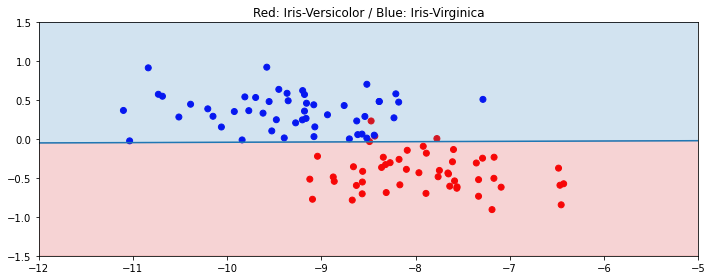

In [21]:
m = - theta_final[0] / theta_final[1]
rnge =  np.arange(-12, -4, 0.1)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
colors = ["r" if label == 0 else "b" for label in y]
axes.scatter(X[:,0], X[:,1], c=colors)
plt.plot(rnge, rnge * m.item())
plt.fill_between(rnge, rnge * m.item(), -1.5, color='tab:red', alpha=0.2)
plt.fill_between(rnge, rnge * m.item(), 1.5, color='tab:blue', alpha=0.2)
plt.title("Red: Iris-Versicolor / Blue: Iris-Virginica")
plt.xlim(-12, -5)
plt.ylim(-1.5, 1.5)
plt.tight_layout()

## Question 3

In [22]:
def mlp(data, thetas):
    theta_0 = thetas[:, :-1] # p x d
    theta_1 = thetas[:, -1] # p x 1
    
    output_0 = sigmoid(jnp.dot(data, theta_0.T)) # N x p
    
    output_1 = sigmoid(jnp.dot(output_0, theta_1)) # N x 1
    
    return output_1

In [23]:
def logistic_loss_mlp(theta, data, labels):
    preds = mlp(data, theta)
    N = len(preds)
    return 1/N * jnp.sum(
        -labels * jnp.log(preds) - (1 - labels) * jnp.log(1-preds)
    )

### a.

If we consider $f(\theta, x) = \sigma(\theta^Tx) $. Then our MLP hypothess function is $\hat{y} = f(w_2, f(W_1, x))$.

$L(W_1, w_2) = -ylog(\hat{y}) - (1-y)log(1-\hat{y})$

Then,
$
\frac{\partial L(W_1, w_2)}{\partial W_1} = \frac{\partial L(W_1, w_2)}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial f(W_1, x)} * \frac{\partial f(W_1, x)}{\partial W_1}
$ by chain-rule.

We know 
$
\frac{\partial f(W_1, x)}{\partial W_1} = \sigma(W_1^Tx)(1- \sigma(W_1^Tx))*\frac{\partial (W_1^Tx)}{\partial W_1} = \sigma(W_1^Tx)(1- \sigma(W_1^Tx))*x
$ \
from the question 2.a.

$
\frac{\partial \hat{y}}{\partial f(W_1, x)} = \frac{\partial f(w_2, f(W_1, x))}{\partial f(W_1, x)} = \sigma(w_2, f(W_1, x))(1-\sigma(w_2, f(W_1,x)))w_2
$

$
\frac{\partial L(W_1, w_2)}{\partial \hat{y}} =\frac{\partial L(W_1, w_2)}{\partial \hat{y}} = \frac{y}{\hat{y}} - (1 - y)\frac{-1}{1 - \hat{y}}
$

Put them all together \
$
\frac{\partial L(W_1, w_2)}{\partial W_1} =  (\frac{y}{\hat{y}} - (1 - y)\frac{-1}{1 - \hat{y}}) * (\sigma(w_2, f(W_1, x))(1-\sigma(w_2, f(W_1,x)))w_2) * (\sigma(W_1^Tx)(1- \sigma(W_1^Tx))*x)
$

Similarly \
$
\frac{\partial L(W_1, w_2)}{\partial w_2} = \frac{\partial L(W_1, w_2)}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial w_2}
$

$
\frac{\partial \hat{y}}{\partial w_2} = \frac{\partial f(w_2, f(W_1, x))}{\partial w_2} = \sigma(w_2 f(W_1,x))(1 - \sigma(w_2 f(W_1,x)))f(W_1,x)
$

Then,
$
\frac{\partial L(W_1, w_2)}{\partial w_2} =  (\frac{y}{\hat{y}} - (1 - y)\frac{-1}{1 - \hat{y}}) * \sigma(w_2 f(W_1,x))(1 - \sigma(w_2 f(W_1,x)))f(W_1,x) = (\frac{y}{\hat{y}} - (1 - y)\frac{-1}{1 - \hat{y}}) * \hat{y}(1 - \hat{y})f(W_1,x)
$

In [24]:
mlp_loss_grad = jax.grad(logistic_loss_mlp, argnums=0)

### b.

In [25]:
p = 5

W_1_init = np.random.randn(p, 2)/10
W_2_init = np.random.randn(p, 1)/10

mlp_theta = np.hstack((W_1_init, W_2_init))
mlp_theta

array([[ 0.0978738 ,  0.22408932,  0.07610377],
       [ 0.1867558 , -0.09772779,  0.0121675 ],
       [ 0.09500884, -0.01513572,  0.04438632],
       [-0.01032189,  0.04105985,  0.03336743],
       [ 0.01440436,  0.14542735,  0.14940791]])

In [26]:
def train_mlp(inputs, labels, theta):
    for epoch in range(epochs):
        if epoch%1000 == 0:
            print("Epoch: {} | Loss: {}".format(epoch, logistic_loss_mlp(jax.numpy.asarray(theta),
                                                                         jax.numpy.asarray(inputs), 
                                                                         jax.numpy.asarray(labels))))
        
        grads = mlp_loss_grad(jax.numpy.asarray(theta),
                              jax.numpy.asarray(inputs), 
                              jax.numpy.asarray(labels))
        

        theta -= learning_rate * grads
        
    return theta

In [27]:
epochs = 10000
learning_rate = 0.05
theta_mlp_final = train_mlp(X, y, mlp_theta)

Epoch: 0 | Loss: 0.6944878697395325
Epoch: 1000 | Loss: 0.5486149191856384
Epoch: 2000 | Loss: 0.20550502836704254
Epoch: 3000 | Loss: 0.14429686963558197
Epoch: 4000 | Loss: 0.1265970915555954
Epoch: 5000 | Loss: 0.118720643222332
Epoch: 6000 | Loss: 0.1143357902765274
Epoch: 7000 | Loss: 0.11152829229831696
Epoch: 8000 | Loss: 0.10954831540584564
Epoch: 9000 | Loss: 0.10805078595876694


In [28]:
print("The last version of the weights:\n \nW_1: {}\n\n W_2: {}\n".format(theta_mlp_final[:,:-1], theta_mlp_final[:,-1]))
print("The loss at the end of the training: {}".format(logistic_loss_mlp(theta_mlp_final, X, y)))

The last version of the weights:
 
W_1: [[-0.07165469  2.8668838 ]
 [ 0.0798801  -4.3705564 ]
 [ 0.07333825 -3.3181493 ]
 [ 0.07369471 -1.6843283 ]
 [-0.07660749  3.9047577 ]]

 W_2: [ 2.762994  -5.2576528 -4.0280347 -2.3067048  3.949962 ]

The loss at the end of the training: 0.10685808211565018


### c.

In [29]:
preds_mlp = mlp(X, theta_mlp_final)

acc = accuracy(preds_mlp, y)
print("Training set accuracy of MLP is: {}%".format(int(100*acc)))

Training set accuracy of MLP is: 97%


### d.

In [ ]:
no_pts = 100
x_1 = np.linspace(-11.5, -5, no_pts)
x_2 = np.linspace(-1.5, 1.5, no_pts)
x_1_grid, x_2_grid = np.meshgrid(x_1, x_2)
p_grid = np.zeros((no_pts, no_pts))
for i in range(no_pts):
    for j in range(no_pts):
        x_1 = x_1_grid[i, j]
        x_2 = x_2_grid[i, j]
        p_grid[i, j] = 0.0 if mlp(jax.numpy.asarray([x_1, x_2]), theta_mlp_final)<0.5 else 1.0
fig, ax = plt.subplots()
colors = ["r" if label == 0 else "b" for label in y]
ax.scatter(X[:,0], X[:,1], c=colors)
ax.contour(x_1_grid, x_2_grid, p_grid, levels=[0.5]);

We have more fluctuations in the decision boundary of the MLP. On the other hand, approximately, they produce the same decision boundary. This similarity comes from the dataset. The dataset is linearly separable so both model is able to find a decision boundary.

The reason of the fluctuations on the decision boundary of the MLP is the complexity of the neural network is greater than the complexity of the logistic regression. This means MLP can fit to more complex datasets, as well.

## Question 4

### a.

The number of epochs to train the model and the learning rate are the some of the hyperparameters in the machine learning. Tuning such hyperparameters is an essential process. There are several ways to tune hyperparameters like **grid search**, **random search**, and **cross validation**. Grid search method creates a grid made of the cartesian product of the possible values of those hyperparameters and tries each of them one by one. Random search, on the other hand, selects random combinations of that grid and train the model only for those combinations. Cross validation is another approach that divides the dataset into *k* folds and treats each of them as the validation set and the rest is the training set seperately. At the end we end up with k datasets based on our original dataset whose validation sets do not intersect. We train k different models and see if one of the models lacks of generalization. If so, that means that hyperparameter combination is not a good set of one.

Particularly, in order to decide the number of epochs to train, we can use other methods like early stopping and convergence test. Early stopping is to train model until the validation loss starts to increase despite to training loss is still decreasing. We can use accuracy for the classification tasks in the reverse manner, as well. Convergence test is to train until the validation loss does not change much. This quantity may be checked by a threshold.

Setting to learning rate, we can conduct a linear search. If we set a high learning rate our model starts to diverge instead of converge. Setting the learning rate so small, we may observe a very little change in the loss value and it does not converge although we trained the model for so many epochs. 

### b.

When we apply a machine learning solution to a particular problem, we want this model to be accurate for not just the data we already have but for the data that will be feed to the trained model for the prediction. This phenomena is called generalization. To be sure that our model is generalized, we adopt a technique called **train-test split**. In this method we divide our dataset into two parts with the propotions like 80-20 or 90-10. The minor part called test set and we do not touch until we report our solution. Then we divide our major part into two with similar proportions we did in the previous step and call the major part as training set and the minor part as validation set. We only train our model with the training set and check the validation performance of our trained model in certain periods to not overfit (or for some specific datasets underfit, as well). Then we tune our hyperparameters regarding the validation performance and choose the model which is best (logistic regression or MLP, in our case). It is important that we do not evaluate our model on the test set until we report the its performance.

### c.

The number of hidden layers and the size of each hidden layer is a hyperparameter for the neural networks (more specifically for MLPs). Thus for selecting the size of a hidden layer (*p*) the techniques mentioned in the previos steps can be used. Train-set split is a 'must' for the generalization. In addition to train-test split, cross validation can be applied as well to ensure generalization.